


## **Project Overview**

As part of a strategic initiative to explore opportunities in the movie industry, I undertook a solo data-driven project aimed at analyzing the current film market. The objective was to identify key trends and insights that could inform the launch of a new film studio.

Using comprehensive datasets, I analyzed recent developments in the film industry to determine which types of films perform best across critical success metrics—such as box office revenue, audience ratings, genre popularity, and critical acclaim. The goal was to understand market dynamics and assess what drives commercial and critical success in today's competitive entertainment landscape.

The insights generated from this analysis are intended to support strategic decision-making regarding film production choices. By identifying high-performing genres and attributes, this project aims to guide investment decisions and maximize the potential for market success. Ultimately, I developed actionable recommendations based on data insights to inform the studio’s content strategy.




# **Business Understanding**

As part of the company’s strategic initiative to enter the movie industry, I am undertaking a comprehensive, data-driven analysis to guide this transition. My goal is to deliver actionable insights that will inform key decisions around content development and investment. By examining historical and current trends in the film industry—spanning box office performance, audience reception, genre popularity, and critical acclaim.I aim to identify the types of films that consistently achieve both commercial profitability and critical recognition.

Leveraging these insights, I will provide evidence-based recommendations to ensure that the newly established movie studio invests in projects with the highest potential for success. This approach is designed not only to reduce the inherent risks associated with entering a new and competitive market but also to position the studio for early traction and long-term sustainability. Through data-backed strategic guidance, I intend to align the studio’s creative direction with market demand, thereby maximizing return on investment and enhancing its competitive edge.



# **Objectives**

The main objectives for the study are:
1.  **Quantify Movie profitability**;Using financial data (production budgets and worldwide gross) to compute Return on Investment(ROI) and identify the most and least profitable films.
2.**Analyze MOvie Ratings**  ;Explore ratings data to understand if how factors such as publisher influence crictical scores,runtime and genre correlate to movies rating.
3.**Investigate the runtime vs movie rating** : Find out whether the average runtime of a movie has any influence on movie ratings.
4.**To identify and analyze blockbuster movies globally**: with a focus on uncovering key factors contributing to their widespread commercial success and audience appeal. This involves exploring high-grossing films across various regions, examining their genres, release strategies, production budgets, marketing efforts, and performance metrics such as box office revenue, audience ratings, and critical acclaim





# 1.**Data Understanding**



In this notebook, I explore and examine multiple datasets to understand their structure and prepare them for in-depth analysis. The data sources include **TMDb**, **The Numbers**, **Box Office Mojo**, and **Rotten Tomatoes**. These datasets provide a comprehensive foundation for analyzing film industry trends, including box office performance, audience ratings, critical reviews, and genre popularity.
First,Import the relevant python libraries and loading the datasets.


*   tmdb_movies :Movies from The Movies Database(TMDb)
*   tn_movie_budgets : Budget and revenue data from The Numbers
*   rt_reviews : Movie reviews from Rotten Tomatoes
*   rt_movie_info : Additional Rotten Rotten Tomatoes metadata






In [1]:
import pandas as pd
import sqlite3
conn=sqlite3.connect("unzipped_im.bd")
tmdb_movies =pd.read_csv('tmdb.movies.csv')
tn_movie_budgets=pd.read_csv('tn.movie_budgets.csv')
rt_reviews=pd.read_csv('rt.reviews.tsv' , sep='\t',encoding ='latin-1')
rt_movie_info=pd.read_csv('rt.movie_info.tsv', sep='\t',encoding='latin-1')

In [2]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
tmdb_movies.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [5]:
rt_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [6]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [7]:
#Checking the first 10 rows
rt_movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [8]:
pd.read_sql("""SELECT *
FROM sqlite_master
WHERE type ='table';
""",conn )

,type,name,tbl_name,rootpage,sql


# 2.**Data Cleaning**

To enable accurate calculations and effective visualizations, I begin by preparing the raw data through a comprehensive cleaning process. This involves handling missing values, removing irrelevant columns, and merging datasets on common keys to create a unified and insightful view of the film industry. The data cleaning steps are detailed in the following cells.

**Cleaning Financial Figures**

Some columns in the tn_movie_budgets dataset(e.g production_budget,domestic_gross, worldwide_gross) were outlined as strings with currency symbols and commas , making them unsuitablefor numerical calculations.
Cleaned These columns by:

*   Removing dollar signs($) and commas (,) using regex
*   Converting them to float data type for numerical analysis
This step is essential for accurate financial comparisions and computations.



In [9]:
#Cleaning the tn_movie_budgets dataset
tn_movie_budgets['production_budget']= tn_movie_budgets['production_budget'].replace(',')
tn_movie_budgets['production_budget']

<ipython-input-9-fe86c1912316>:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  tn_movie_budgets['production_budget']= tn_movie_budgets['production_budget'].replace(',')


,production_budget
0,"$425,000,000"
1,"$410,600,000"
2,"$350,000,000"
3,"$330,600,000"
4,"$317,000,000"
...,...
5777,"$7,000"
5778,"$6,000"
5779,"$5,000"
5780,"$1,400"


In [10]:
# Convert currency columns to numeric by removing any symbols/commas (if needed)
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)
tn_movie_budgets['production_budget']


,production_budget
0,425000000.0
1,410600000.0
2,350000000.0
3,330600000.0
4,317000000.0
...,...
5777,7000.0
5778,6000.0
5779,5000.0
5780,1400.0


 **Calculating the rate of Investment**

I created a new metric -**Return on Investment(ROI)** -to quantify how profitable each movie was relative to its production budget. This is to show how many times the profit exceeded the budget used for the production of the movie.
**ROI** IS calculated as;
**ROI** =Worldwide gross- Production budget


*   **ROI > 0  IS Profit**
*   **ROI < O IS LOSS**
* **ROI = 1 IS Doubled its budget**
This allow us to rank movies by profitability rather than raw revenue.





In [11]:
# Compute ROI as a ratio (profit divided by budget)
tn_movie_budgets['ROI'] = (tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']) / tn_movie_budgets['production_budget']

# Preview the ROI column
tn_movie_budgets[['movie', 'production_budget', 'worldwide_gross', 'ROI']].head()

,movie,production_budget,worldwide_gross,ROI
0,Avatar,425000000.0,2.776345e+09,5.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,1.546673
2,Dark Phoenix,350000000.0,1.497624e+08,-0.572108
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,3.243841
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,3.153696


 **Most and Least Profitable Movies**

After calculating ROI ,I sorted the dataset to find:


*   Top 10 most profitable movies
*  Bottom 10 least profitable movies
This shows us the insights into what kind of films yields the highest returns - potentially lowr - budget films with high gross returns.




In [12]:
#Checking the top 10 profitable movies in ascending order
top_10_profitable =tn_movie_budgets.sort_values(by='ROI', ascending=False).head(10)
top_10_profitable.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5745,46,"Jun 30, 1972",Deep Throat,25000.0,"$45,000,000",45000000.0,1799.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,"$8,750,000",99750000.0,497.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,"$107,918,810",194183034.0,430.517853
5679,80,"Jul 10, 2015",The Gallows,100000.0,"$22,764,410",41656474.0,415.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,"$140,539,099",248300000.0,412.833333
5709,10,"May 7, 2004",Super Size Me,65000.0,"$11,529,368",22233808.0,341.058585
5346,47,"Aug 13, 1942",Bambi,858000.0,"$102,797,000",268000000.0,311.354312
5773,74,"Feb 26, 1993",El Mariachi,7000.0,"$2,040,920",2041928.0,290.704000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000.0,"$12,087,064",30087064.0,262.921614
5210,11,"Nov 21, 1976",Rocky,1000000.0,"$117,235,147",225000000.0,224.000000


In [13]:
#checking the least profitable movie
bottom_10_profitable = tn_movie_budgets.sort_values(by='ROI', ascending=True).head(10)
bottom_10_profitable

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
4767,68,"Mar 17, 2015",Something Wicked,3000000.0,$0,0.0,-1.0
5352,53,"Dec 31, 2008",Harrison Montgomery,850000.0,$0,0.0,-1.0
5186,87,"Feb 3, 2015",Bleeding Hearts,1200000.0,$0,0.0,-1.0
479,80,"Dec 13, 2017",Bright,90000000.0,$0,0.0,-1.0
4759,60,"Jul 28, 1951",Alice in Wonderland,3000000.0,$0,0.0,-1.0
4760,61,"Oct 1, 2010",Barry Munday,3000000.0,$0,0.0,-1.0
4761,62,"Dec 31, 2009",The Deported,3000000.0,$0,0.0,-1.0
4762,63,"Dec 31, 2009",Chicago Overcoat,3000000.0,$0,0.0,-1.0
4763,64,"Sep 13, 2011",Never Back Down 2: The Beatdown,3000000.0,$0,0.0,-1.0
4764,65,"Dec 31, 2015",AWOL-72,3000000.0,$0,0.0,-1.0


In [14]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


 **Merging Movie Datasets**

I merged the tmdb_movies and tn_movie_budgets datasets using cleaned and lowercase movie titles.
This combined dataset allows for more comprehensive analysisby utilizing the attributes from TMDb and the financial details from the Numbers.


In [15]:
#Cleaning the movie titles to make sure there are no spaces and lowercases
tmdb_movies['title']=tmdb_movies['title'].str.strip().str.lower()
tmdb_movies['title']

,title
0,harry potter and the deathly hallows: part 1
1,how to train your dragon
2,iron man 2
3,toy story
4,inception
...,...
26512,laboratory conditions
26513,_exhibit_84xxx_
26514,the last one
26515,trailer made


In [16]:
# --- Merge datasets on movie title ---
merged = pd.merge(
    left=tn_movie_budgets,
    right=tmdb_movies,
    left_on='movie',
    right_on='title',
    how='inner'  # Use 'inner' to keep only matching records
)

# Preview merged DataFrame
merged.head()


,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,ROI,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,59,"Nov 13, 2009",2012,200000000.0,"$166,112,167",757677748.0,2.788389,9404,[99],501497,ja,2012,1.156,2013-03-21,2012,4.0,2
1,4,"Dec 14, 1979",1941,32000000.0,"$34,175,000",94875000.0,1.964844,14330,[35],11519,en,1941,9.755,1979-12-14,1941,5.7,262
2,22,"Apr 12, 2013",42,31000000.0,"$95,020,213",97470701.0,2.144216,7989,[18],109410,en,42,11.280,2013-04-12,42,7.0,1028
3,59,"Sep 15, 2017",mother!,30000000.0,"$17,800,004",42531076.0,0.417703,20707,"[18, 27, 9648]",381283,en,mother!,15.227,2017-09-15,mother!,7.0,3458
4,93,"Mar 21, 2014",50 to 1,10000000.0,"$1,069,454",1069454.0,-0.893055,11868,"[35, 18]",197583,en,50 to 1,2.852,2014-03-21,50 to 1,6.2,25


# **3.Visualizations**

In order to observe trends and patterns from the datasets  I contrust various visualization that will help to provide insights later on.I imported the various python libraries requred for plotting.


In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


**Top 10 Profitable Movies**

Visualization of the production budgets vs worldwide gross for the top 10 profitable movies using a dual bar chart.This helped  visually assessment:


*   How some lower budget films generated high reveue?
*  Which movies had high budgets and even higher grosses?



In [18]:
tn_movie_budgets['profit'] =tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'].head()
tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,9.997217e+08
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,$0,0.000000e+00,-1.000000,NaN
5778,79,"Apr 2, 1999",Following,6000.0,"$48,482",2.404950e+05,39.082500,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03,-0.732400,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,$0,0.000000e+00,-1.000000,NaN


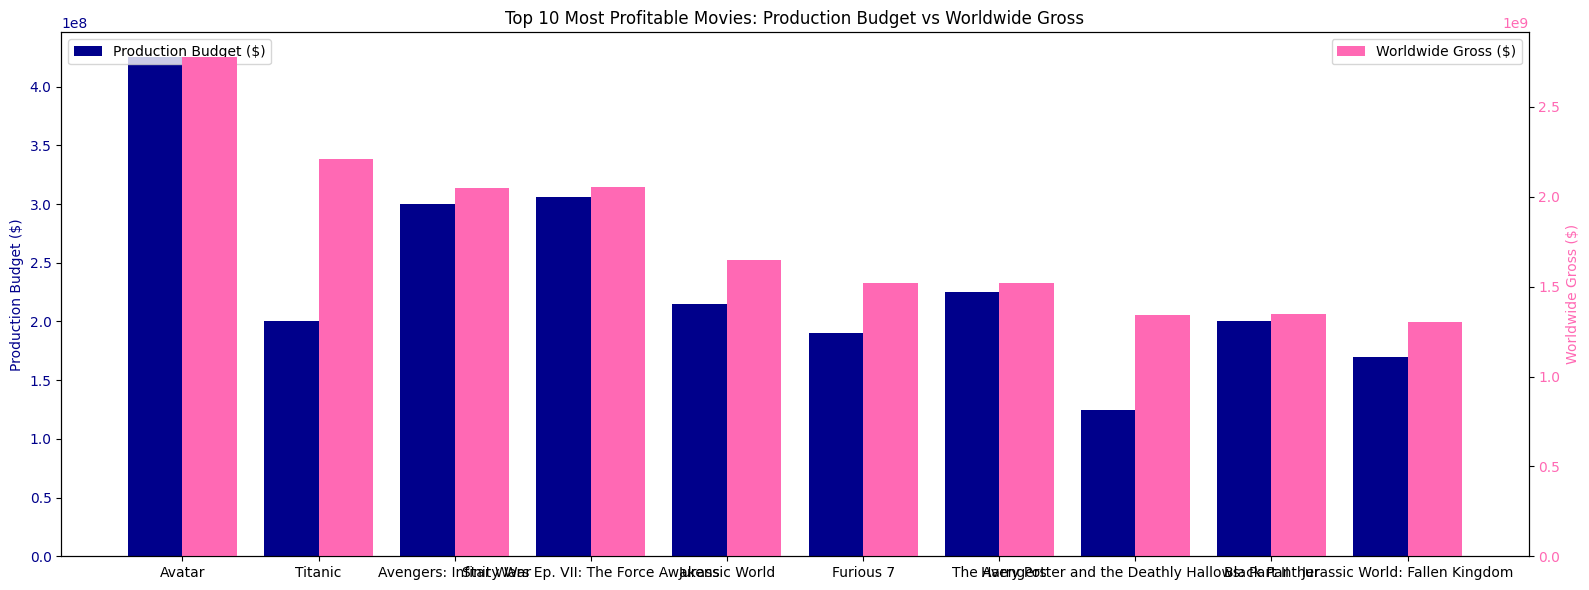

In [19]:


# Create a 'profit' column (if not already in the DataFrame)
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

# Top 10 most profitable movies
top_10_profitable = tn_movie_budgets.sort_values(by='profit', ascending=False).head(10)

movies = top_10_profitable['movie']
budget = top_10_profitable['production_budget']
gross = top_10_profitable['worldwide_gross']

x = np.arange(len(movies))
width = 0.4

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar chart for Production Budget
bar1 = ax1.bar(x - width/2, budget, width, label='Production Budget ($)', color='darkblue')
ax1.set_ylabel('Production Budget ($)', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Bar chart for Worldwide Gross using secondary y-axis
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, gross, width, label='Worldwide Gross ($)', color='hotpink')
ax2.set_ylabel('Worldwide Gross ($)', color='hotpink')
ax2.tick_params(axis='y', labelcolor='hotpink')

# X-axis labels and title
plt.xticks(x, movies, rotation=75)
plt.title('Top 10 Most Profitable Movies: Production Budget vs Worldwide Gross')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


**Visualization of financial data using ROI**

Comparing the production budget to ROI enables us to cater for movies like "Deep throat" that had significantly lower production budgets and didn't make alot of profit compared to movies like Avatar but made very high ROI because of the low production budget.


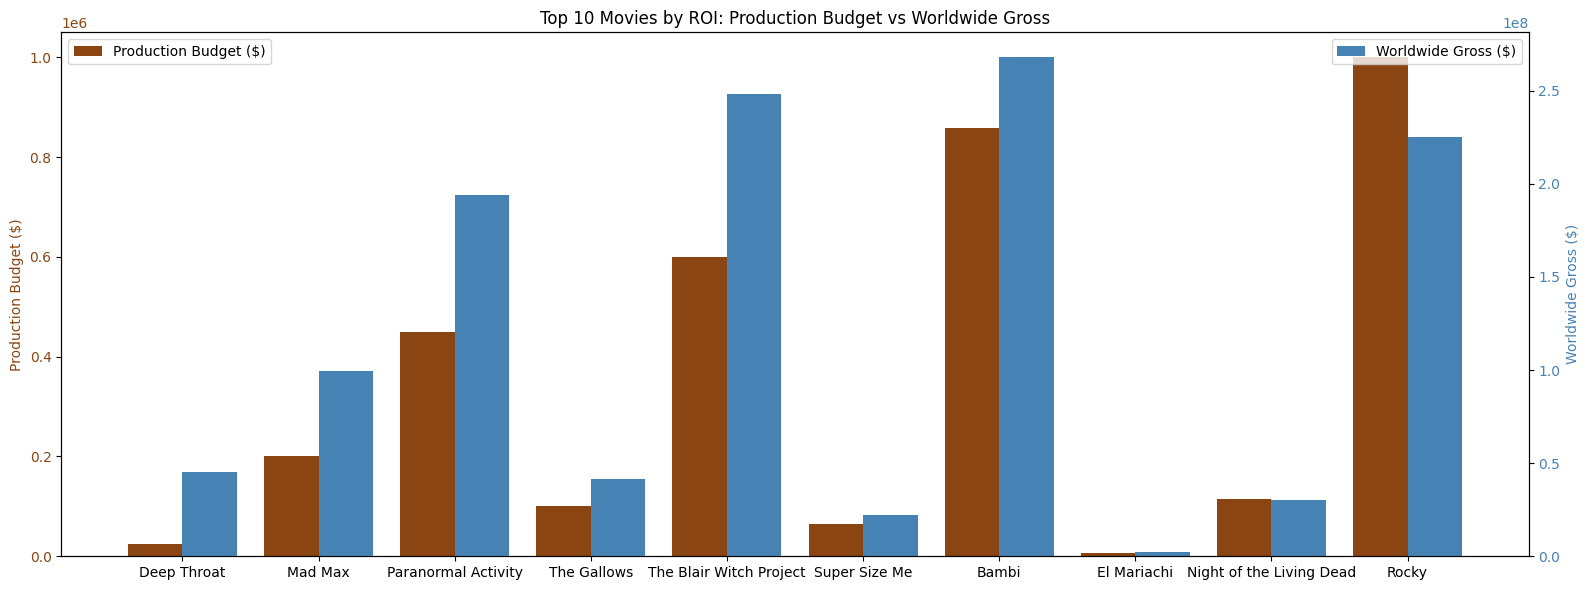

In [20]:

# Sort by ROI and get the top 10
top_10_profitable = tn_movie_budgets.sort_values(by='ROI', ascending=False).head(10)

# Extract required data
movies = top_10_profitable['movie']
budget = top_10_profitable['production_budget']
gross = top_10_profitable['worldwide_gross']

# Plotting setup
x = np.arange(len(movies))
width = 0.4

fig, ax1 = plt.subplots(figsize=(16, 6))

# Bar for production budget
bar1 = ax1.bar(x - width/2, budget, width, label='Production Budget ($)', color='saddlebrown')
ax1.set_ylabel('Production Budget ($)', color='saddlebrown')
ax1.tick_params(axis='y', labelcolor='saddlebrown')

# Bar for worldwide gross (secondary axis)
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, gross, width, label='Worldwide Gross ($)', color='steelblue')
ax2.set_ylabel('Worldwide Gross ($)', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

# X-axis and title
plt.xticks(x, movies, rotation=75)
plt.title('Top 10 Movies by ROI: Production Budget vs Worldwide Gross')

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout adjustment
fig.tight_layout()
plt.show()



# **Further Analysis & Visualization**

Created multiple plots to uncover trends:
**1.Box Plot** distribution of budgets and revenues:


*   Reveals outliers and the wide range in production budgets and grosses.
**2.Scatter Plot** Budgets vs Worldwide gross: To show whether they is a positive or negative correlation?

**3.Bar Plot**Top 10 movies by worldwide gross:Highlights blockbusters performers.




<ipython-input-21-33e2a008c04c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


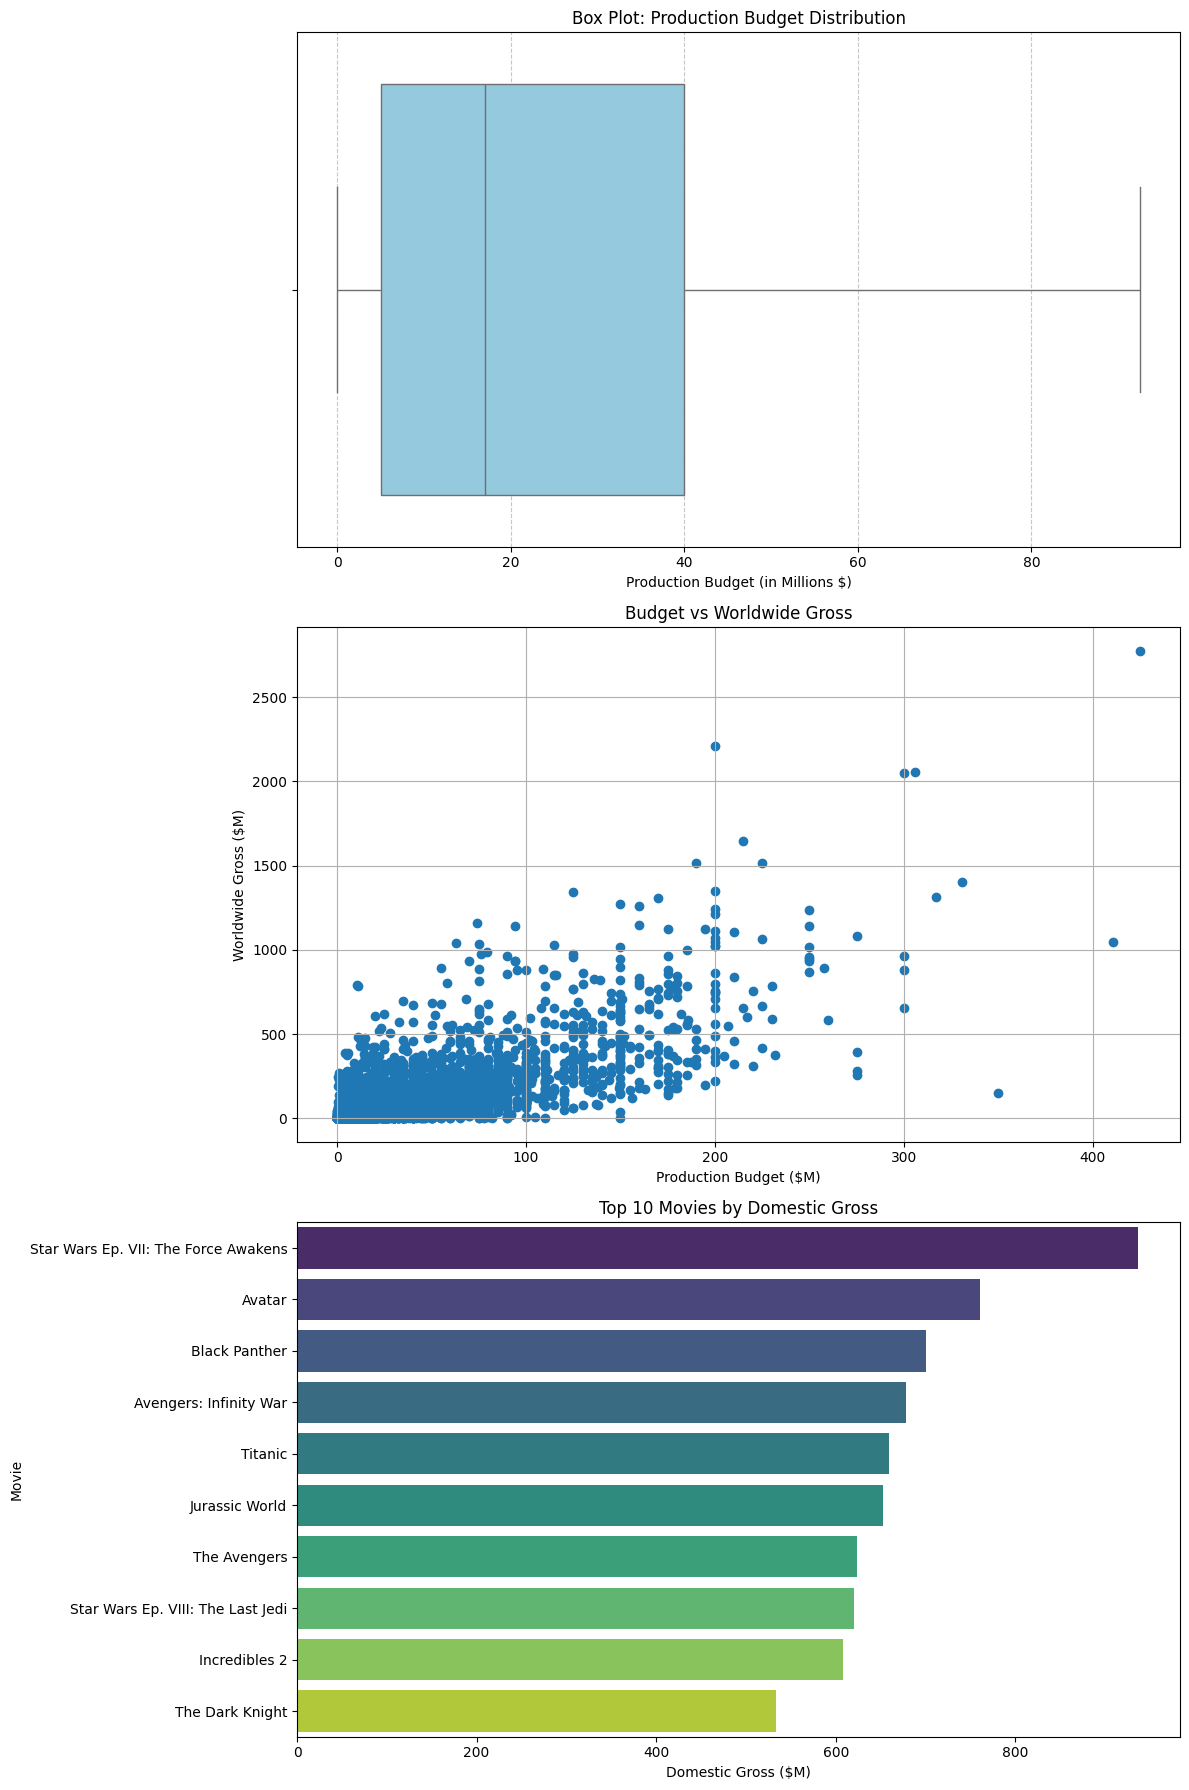

In [21]:


# Clean monetary columns: remove $ and commas, then convert to float
monetary_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in monetary_columns:
    tn_movie_budgets[col] = tn_movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)

# Adjust height to accommodate 3 plots
plt.figure(figsize=(12, 18))

# 1. Box Plot: Distribution of Production Budgets
plt.subplot(3, 1, 1)
sns.boxplot(
    x=tn_movie_budgets['production_budget'] / 1e6,
    color='skyblue',
    orient='h',
    showfliers=False  # Optional: hide outliers for cleaner view
)
plt.xlabel('Production Budget (in Millions $)')
plt.title('Box Plot: Production Budget Distribution')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)


# 2. Scatter Plot: Budget vs Worldwide Gross
plt.subplot(3, 1, 2)
plt.scatter(tn_movie_budgets['production_budget'] / 1e6, tn_movie_budgets['worldwide_gross'] / 1e6)
plt.xlabel('Production Budget ($M)')
plt.ylabel('Worldwide Gross ($M)')
plt.title('Budget vs Worldwide Gross')
plt.grid(True)

# 3. Bar Plot: Top 10 Movies by Domestic Gross
top_10_domestic = tn_movie_budgets.nlargest(10, 'domestic_gross')
plt.subplot(3, 1, 3)
sns.barplot(
    y=top_10_domestic['movie'],
    x=top_10_domestic['domestic_gross'] / 1e6,
    palette='viridis'
)
plt.xlabel('Domestic Gross ($M)')
plt.ylabel('Movie')
plt.title('Top 10 Movies by Domestic Gross')

# Show plots
plt.tight_layout()
plt.show()


# **Brief Overview**

Checking the shape,size and columns of thr rt_movie_info and rt_reviews datasets


In [22]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [23]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [24]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Ratings data analysis
To investigate ratings data to see if factors such as Genre, Runtime and Publisher scores correlate.
We attempt to find how and to what extent they relate to each other
Clean the 'rt_movie_info' dataset
We sart by preparing the data.

In [30]:

# Step 1: Keep only specified columns in the rt_movie_info DataFrame
keep_columns_movie_info = ['id', 'genre', 'runtime', 'studio', 'box_office']
df_movie_info = rt_movie_info [keep_columns_movie_info]
df_movie_info.head()

,id,genre,runtime,studio,box_office
0,1,Action and Adventure|Classics|Drama,104 minutes,NaN,NaN
1,3,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One,"600,000"
2,5,Drama|Musical and Performing Arts,116 minutes,NaN,NaN
3,6,Drama|Mystery and Suspense,128 minutes,NaN,NaN
4,7,Drama|Romance,200 minutes,NaN,NaN


In [31]:
# id: Convert to integer, drop rows with missing id
df_movie_info = df_movie_info.dropna(subset=['id'])
df_movie_info['id'] = df_movie_info['id'].astype(int)


In [32]:
# genre: Strip whitespace, capitalize, fill missing with 'Unknown'
df_movie_info['genre'] = df_movie_info['genre'].str.strip().str.capitalize().fillna('Unknown')

In [33]:

# runtime: Extract number from 'X minutes', fill missing with median, convert to integer
def clean_runtime(runtime):
    if pd.isna(runtime):
        return None
    try:
        # Extract number from 'X minutes'
        return int(runtime.split()[0])
    except (ValueError, AttributeError):
        return None

df_movie_info['runtime'] = df_movie_info['runtime'].apply(clean_runtime)
median_runtime = df_movie_info['runtime'].median()
df_movie_info['runtime'] = df_movie_info['runtime'].fillna(median_runtime).astype(int)


In [34]:
# studio: Strip whitespace, title case, fill missing with 'Unknown'
df_movie_info['studio'] = df_movie_info['studio'].str.strip().str.title().fillna('Unknown')

In [35]:
# box_office: Remove currency symbols, handle commas, fill missing with 0, convert to integer
def clean_box_office(box):
    if pd.isna(box) or box == '':
        return 0
    try:
        # Remove '$' and commas, convert to integer
        return int(str(box).replace('$', '').replace(',', ''))
    except ValueError:
        return 0

df_movie_info['box_office'] = df_movie_info['box_office'].apply(clean_box_office).astype(int)

In [36]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


**Rt_reviews Analysis**

Changing the rating to numeric values i.e Integers for analysis .Ensuring the missing values are removed from the dataset .merge the movie_info dataset in order to perform analysis.

In [37]:
# Ensure 'rating' is numeric
rt_reviews['rating'] = pd.to_numeric(rt_reviews['rating'], errors='coerce')

# Drop rows with NaN in 'rating'
rt_reviews = rt_reviews.dropna(subset=['rating'])

# Convert 'rating' to integer for consistency with 'runtime'
rt_reviews['rating'] = rt_reviews['rating'].astype(int)



<ipython-input-37-fd3e8bad05a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews['rating'] = rt_reviews['rating'].astype(int)


In [38]:

# Merge on id
merged_df = pd.merge(rt_reviews, df_movie_info, left_on='id', right_on='id', how='inner')
merged_df.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date,genre,runtime,studio,box_office
0,3,"... a movie about a sentient zombie, trapped i...",8,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012",Drama|science fiction and fantasy,108,Entertainment One,600000
1,8,NaN,6,rotten,Brian Webster,0,Apollo Guide,"July 24, 2001",Drama|kids and family,95,Warner Bros. Pictures,0
2,10,If all you're looking for is a mild comedy wit...,6,rotten,Scott Weinberg,0,Apollo Guide,"March 16, 2004",Comedy,82,Paramount Pictures,41032915
3,10,There's probably a sweet little comedy hidden ...,6,rotten,Brian Webster,0,Apollo Guide,"June 12, 2002",Comedy,82,Paramount Pictures,41032915
4,13,"While it's most certainly not light viewing, a...",8,fresh,Brian Webster,0,Apollo Guide,"October 3, 2007",Drama,123,Sony Pictures Classics,224114
5,13,I do just what I want to do/ I want everything...,8,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"June 29, 2007",Drama,123,Sony Pictures Classics,224114
6,17,Tupac's evolution as an artist showed us a you...,7,fresh,Dan Jardine,0,Cinemania,"September 12, 2012",Unknown,100,Unknown,0
7,17,The film would have been strengthened if it ha...,7,fresh,Dan Jardine,0,Apollo Guide,"August 24, 2004",Unknown,100,Unknown,0
8,23,"If American Hustle has anything real to say, i...",3,fresh,Bill Newcott,0,AARP Movies for Grownups,"April 18, 2016",Drama,129,Sony Pictures,99165609
9,23,Russell's world view is essentially optimistic...,8,fresh,Dan Jardine,0,Cinemania,"January 12, 2014",Drama,129,Sony Pictures,99165609


In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          750 non-null    int64 
 1   review      651 non-null    object
 2   rating      750 non-null    int64 
 3   fresh       750 non-null    object
 4   critic      733 non-null    object
 5   top_critic  750 non-null    int64 
 6   publisher   747 non-null    object
 7   date        750 non-null    object
 8   genre       750 non-null    object
 9   runtime     750 non-null    int64 
 10  studio      750 non-null    object
 11  box_office  750 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 70.4+ KB


# **Rotten Tomatoes Rating Analysis**


This allows exploring relationships between movie ratings ,runtime , and publisher reviews.We construct the following visualization:


*   Scatter Plot Shows the distribution of runtime against the rating.

*   Bar Plot Shows the average Runtime by rating
*   Box Plot Shows Ratings by Publisher
These plots help to identify patterns in critical reviewing resource.





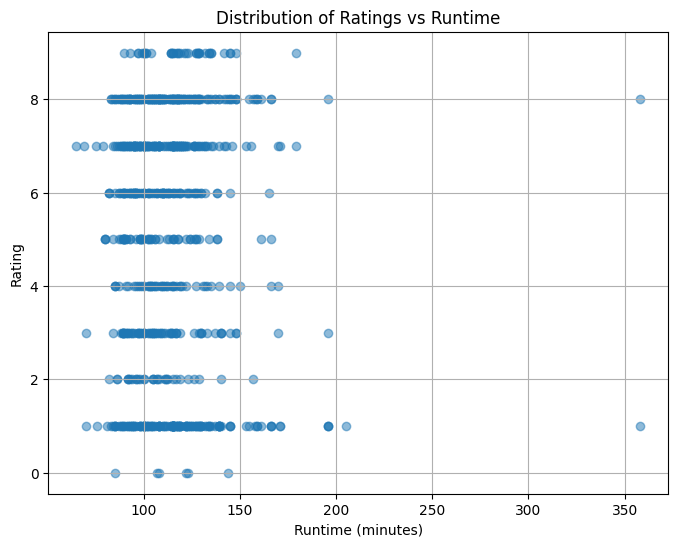

In [40]:
#plotting the distribution of ratings vs runtime
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['runtime'], merged_df['rating'], alpha=0.5)
plt.title('Distribution of Ratings vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


Observations:
There doesn't appear to be a strong linear correlation between runtime and rating. Movies of any length can receive a wide range of ratings.

<ipython-input-41-536dda97bd9e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_runtime.index, y=avg_runtime.values, palette='coolwarm')


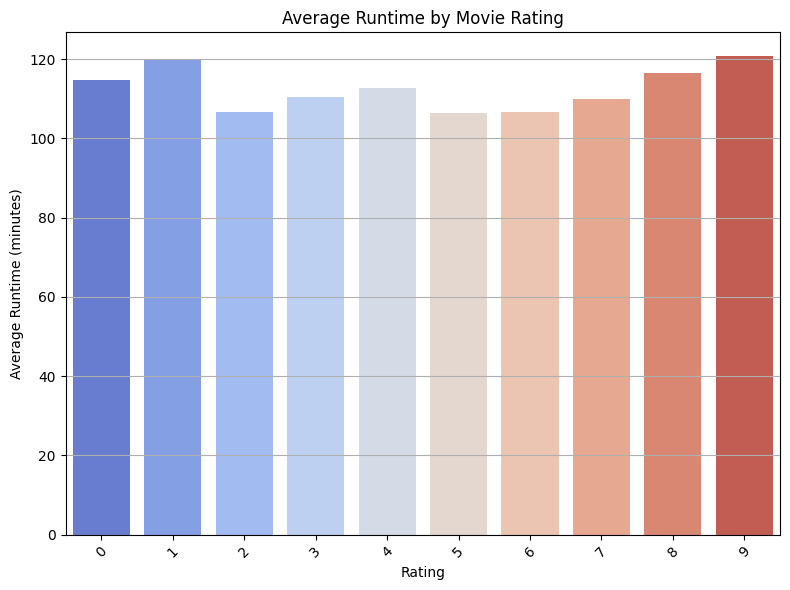

In [41]:


# Drop missing values in 'runtime' and 'rating'
clean_df = merged_df.dropna(subset=['runtime', 'rating'])

# Group by rating and calculate average runtime
avg_runtime = clean_df.groupby('rating')['runtime'].mean().sort_values()

# Plot bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_runtime.index, y=avg_runtime.values, palette='coolwarm')
plt.title('Average Runtime by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observations:
The average runtime appears to be relatively consistent across different ratings.
Ratings of 4, 5, and 6 have a slightly lower average runtime, but the difference is not very large.

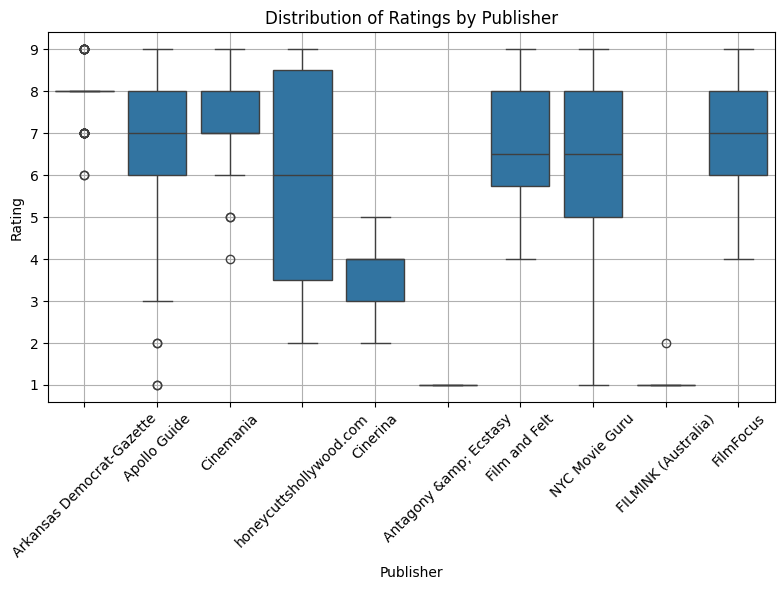

In [43]:

# Handle NaN values in the 'publisher' column
merged_df['publisher'] = merged_df['publisher'].fillna('Unknown')

# Extract the top 10 publishers based on the number of reviews
top_publishers = merged_df['publisher'].value_counts().nlargest(10).index
# Filter the DataFrame to include only the top publishers
merged_df_top_publishers = merged_df[merged_df['publisher'].isin(top_publishers)]
# Plotting the distribution of ratings vs publisher
plt.figure(figsize=(8, 6))
sns.boxplot(x='publisher', y='rating', data=merged_df_top_publishers)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


### Key Findings:
- **Scatter Plot:** Showed that most movies fall within a typical runtime range (80–120 minutes), and their ratings vary with some outliers.
- **Bar Plot of Avg. Runtime by Rating:** Indicates that higher-rated films tend to be slightly longer on average.
- **Boxplot of Ratings by Publisher:** Shows potential bias across different review publishers.

These insights can help identify patterns in critical reception based on runtime or reviewing source.

# **4.Statistical Analysis**


To confirm our insights we conduct statisctical analysis to confirm whether our conclusions are valid.These incluse:

**linear regression**  and **Z test**

In this section we use different statistical packages in python namely "sklearn", "scipy" and "statsmodels"

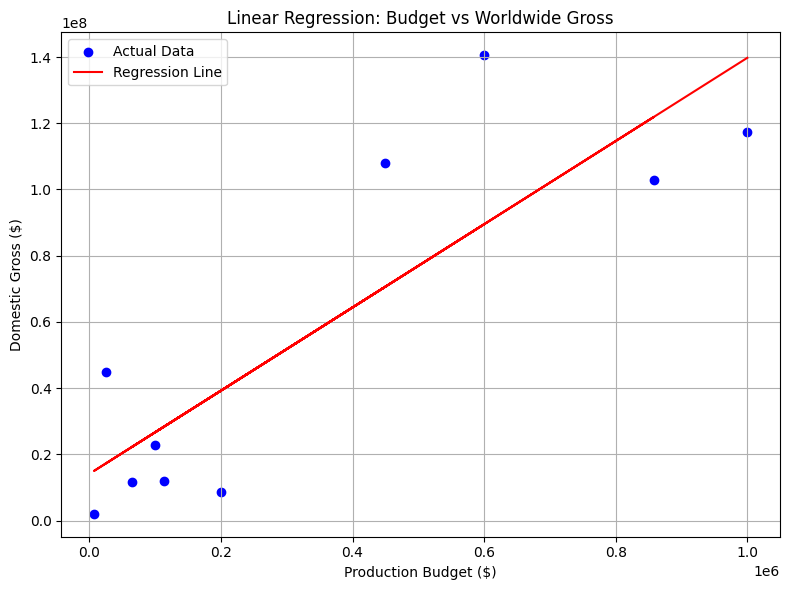

In [44]:

from sklearn.linear_model import LinearRegression

#Prepare data
top_10_profitable = tn_movie_budgets.sort_values(by='ROI', ascending=False).head(10)
budget = top_10_profitable['production_budget'].values.reshape(-1, 1)
gross = top_10_profitable['domestic_gross'].values

#Fit linear regression
model = LinearRegression()
model.fit(budget, gross)
predicted_gross = model.predict(budget)

#Plot
plt.figure(figsize=(8, 6))
plt.scatter(budget, gross, color='blue', label='Actual Data')
plt.plot(budget, predicted_gross, color='red', label='Regression Line')

plt.xlabel('Production Budget ($)')
plt.ylabel('Domestic Gross ($)')
plt.title('Linear Regression: Budget vs Worldwide Gross')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



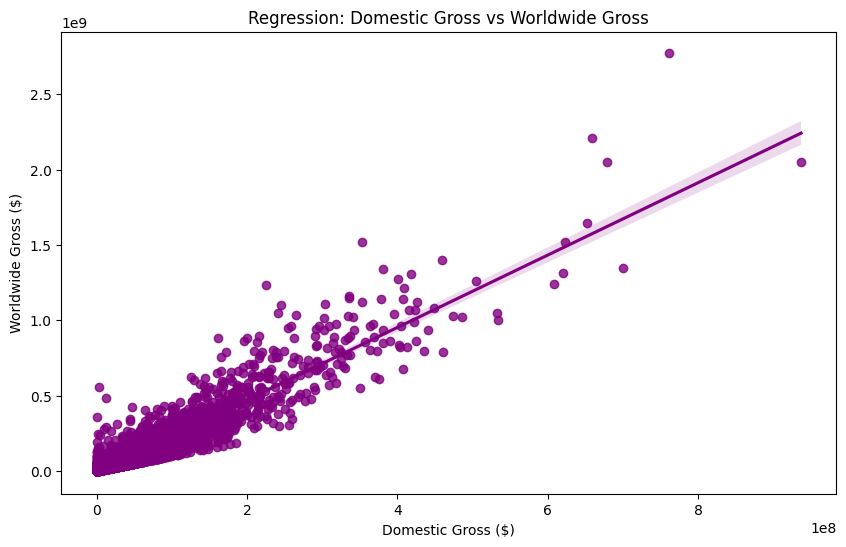

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x='domestic_gross', y='worldwide_gross', data=tn_movie_budgets, color='purple')
plt.title('Regression: Domestic Gross vs Worldwide Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Worldwide Gross ($)')
plt.show()

## Conclusion
This shows that there's a **positive correlation**.
Positive Correlation:
The regression line typically slopes upward, indicating a positive relationship — as domestic gross increases, worldwide gross tends to increase too.

Fit of the Line (Rough Visual R²):
If most of the data points hug the regression line closely, the relationship is strong, and domestic gross is a good predictor of worldwide gross.
If the points are widely scattered, the relationship is weaker, and other factors (like international appeal, genre, or marketing) also play a big role.

**Outliers**:
You can see some movies far above the line, it means those films performed much better internationally than locally.
If a few are below the line, those movies underperformed internationally compared to their domestic performance.

In [46]:
# Check if the line is a fit for the dataset
from sklearn.metrics import r2_score

r2 = r2_score(gross, predicted_gross)
print(f"R² score: {r2:.2f}")


R² score: 0.73


**Adjusted R2** If the R2 is close or equal to 1, it is moderately correlated. The fit is good.

In [47]:
# Conducting a z-test
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as smp
import statsmodels.stats.weightstats as sw
import statsmodels.stats.multitest as smm
import statsmodels.stats.diagnostic as smd
mean_rating = merged_df['rating'].mean()
std_rating = merged_df['rating'].std()
n = len(merged_df['rating'])

# Calculate the standard error
standard_error = std_rating / np.sqrt(n)

# Calculate the z-score
z_score = (mean_rating - 0) / standard_error

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The mean rating is significantly different from 0.")
else:
    print("Fail to reject the null hypothesis: The mean rating is not significantly different from 0.")



Z-score: 50.68
P-value: 0.0000
Reject the null hypothesis: The mean rating is significantly different from 0.


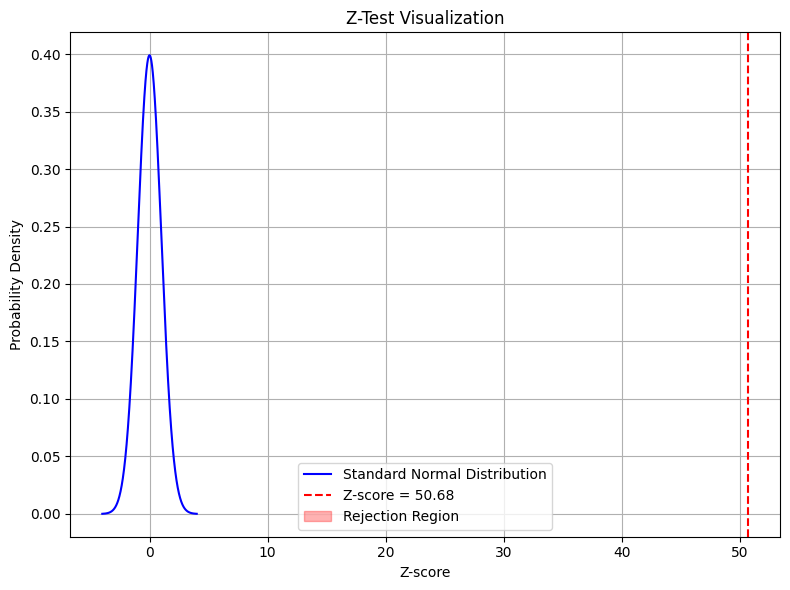

In [48]:
from scipy.stats import norm

# Generate data for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Plot the standard normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Highlight the z-score
plt.axvline(z_score, color='red', linestyle='--', label=f'Z-score = {z_score:.2f}')
plt.fill_between(x, 0, y, where=(x >= z_score), color='red', alpha=0.3, label='Rejection Region')

# Add labels and legend
plt.title('Z-Test Visualization')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## 5. Final Insights & Recommendations

### Key Takeaways:
- **Financial Data:** Comparing budget with worldwide gross can be viewed usng either 'Profit' or 'ROI'.
- **Ratings Data:** No clear-cut relationship between runtime and rating, but publishers show different scoring behaviors.
- **Visualizations:** Scatter and regression plots confirmed positive correlations between budget and gross revenue, more specifically domestically and worldwide.
- **Merged Dataset Value:** Combining attributes of (TMDb, RT) with financials (The Numbers) enriched analysis.

### Recommendations:
1. 🎯 When assessing a movie's success, consider both domestic and international performance.
2. ✅ Focus on movies with higher ROIs as this indicates that less money is spent on production budget and profits are maximized.
3. 🔍 Consider reviewer source when analyzing ratings — some publishers are more generous than others since opinions are undisputed and depend on a publishers's point of view.


# 6. Limitations
1. Combining attributes from differnt datasets leads to the loss of some several rows of data that could have had an impact on the study.
2. Some financial data on the worlwide and domestic gross may be skewed due to copyright infringment and pirating.